In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import imageio

In [2]:
%matplotlib inline

In [3]:
img = imageio.imread('./data/cat-color.png')

In [4]:
print(img.shape)

(667, 730, 3)


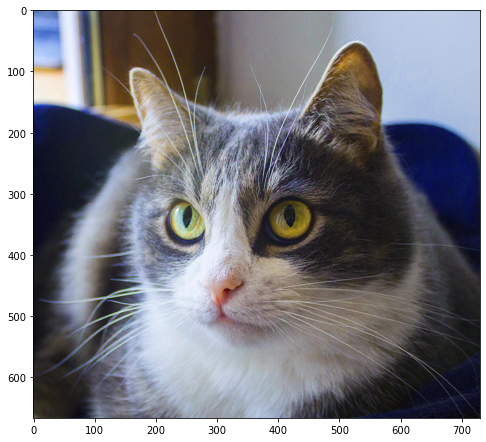

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(img);

In [6]:
img = img.astype(np.float32)/255.0

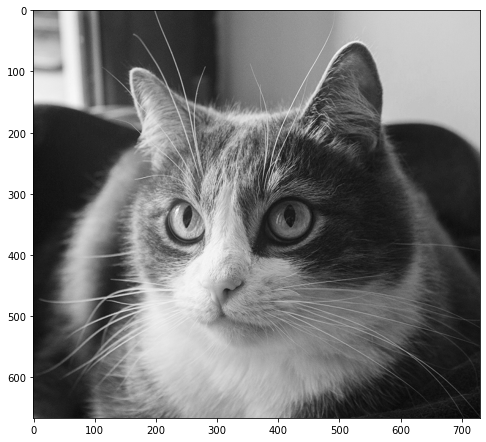

In [7]:
img_bw = np.mean(img, axis=2)
plt.figure(figsize=(8,8))
plt.imshow(img_bw, cmap='gray');

In [8]:
from skimage.color import rgb2hsv, hsv2rgb

In [9]:
img_hsv = rgb2hsv(img)

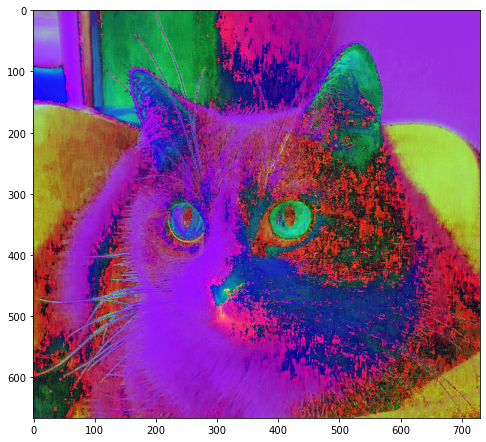

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(img_hsv);

In [11]:
img_hsv_copy = np.copy(img_hsv)

In [12]:
img_hsv_copy[:,:,1] *= 1000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


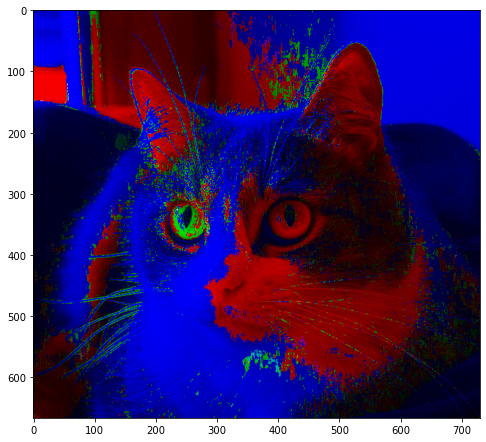

In [13]:
plt.figure(figsize=(8,8))
plt.imshow(hsv2rgb(img_hsv_copy));

### Бинаризация по порогу

In [14]:
img = imageio.imread('./data/coin.png')
img = img.astype(np.float32)/255.0

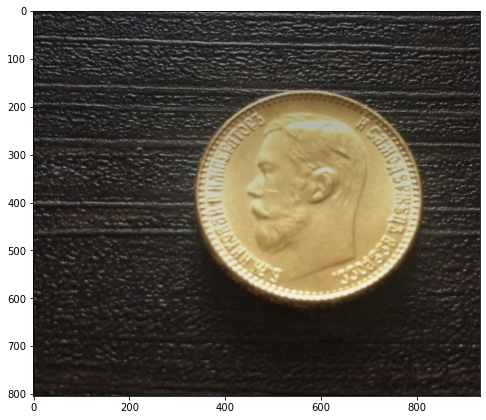

In [15]:
plt.figure(figsize=(8,8))
plt.imshow(img);

In [16]:
threshold = 0.45
img_bw = np.mean(img, axis=2)
img_bin = (img_bw > threshold).astype(np.float32)

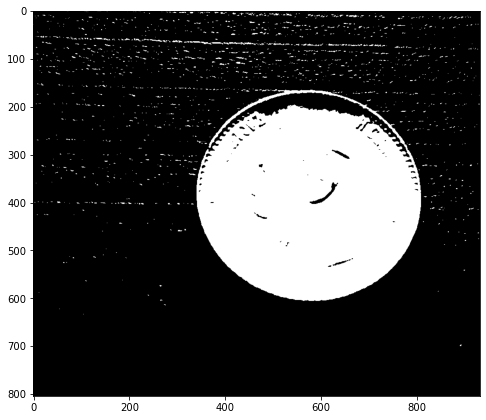

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(img_bin, cmap='gray');

### Оконная обработка

In [18]:
img = imageio.imread('./data/cat-bw.png')
img = img.astype(np.float32)/255.0

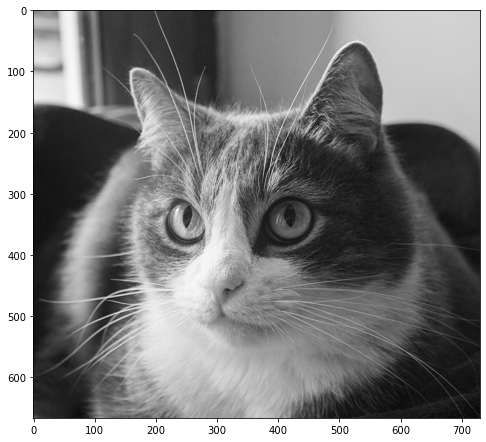

In [19]:
plt.figure(figsize=(8,8))
plt.imshow(img);

In [20]:
def box_blur(x):
    return np.mean(x)

In [21]:
def filter(img, _filter):
    win_size = (11, 11)

    out_img = np.zeros((img.shape[0] - win_size[0] + 1, 
                       img.shape[1] - win_size[1] + 1),
                       dtype=np.float32)

    for i in range(out_img.shape[0]):
        for j in range(out_img.shape[1]):
            x = img[i:i+win_size[0], j:j+win_size[1]]
            out_img[i,j] = _filter(x)
            
    return out_img

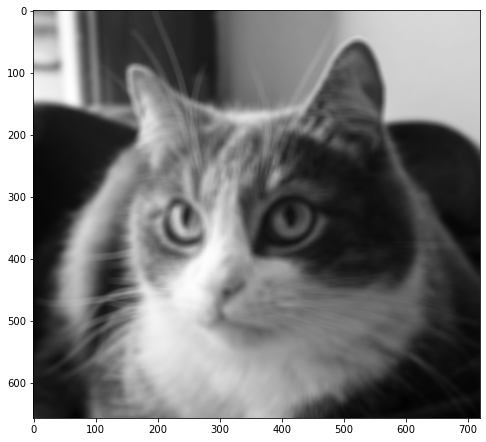

In [22]:
out_img = filter(img, box_blur)
plt.figure(figsize=(8,8))
plt.imshow(out_img, cmap='gray');

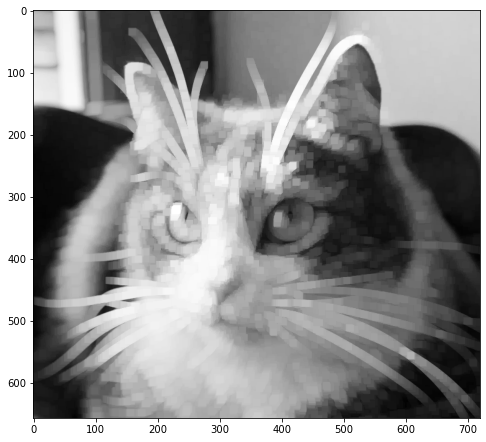

In [23]:
out_img = filter(img, np.max)
plt.figure(figsize=(8,8))
plt.imshow(out_img, cmap='gray');

### Свертка

In [28]:
win_size = (11, 11)

In [29]:
def box_blur():
    w = np.ones(win_size, dtype=np.float32)
    w = w/np.sum(w)
    return w

In [30]:
def gaussian():
    w = np.zeros(win_size, dtype=np.float32)
    sigma = 3
    
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                            -(j-w.shape[1]//2)**2 / sigma**2 / 2)
        
    return w/np.sum(w)

In [31]:
def convolute(img, core):
    out_img = np.zeros((img.shape[0] - win_size[0] + 1, 
                       img.shape[1] - win_size[1] + 1),
                       dtype=np.float32)
    
    for i in range(out_img.shape[0]):
        for j in range(out_img.shape[1]):
            x = img[i:i+win_size[0], j:j+win_size[1]]
            out_img[i,j] = np.sum(core * x)
            
    return out_img

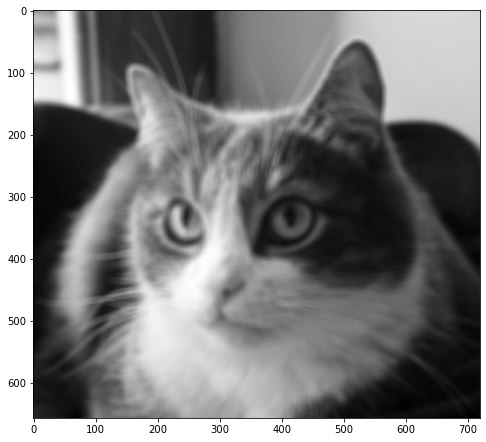

In [32]:
out_img = convolute(img[:,:,0], box_blur())
plt.figure(figsize=(8,8))
plt.imshow(out_img, cmap='gray');

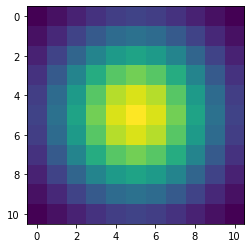

In [33]:
plt.imshow(gaussian())

Wall time: 7.75 s


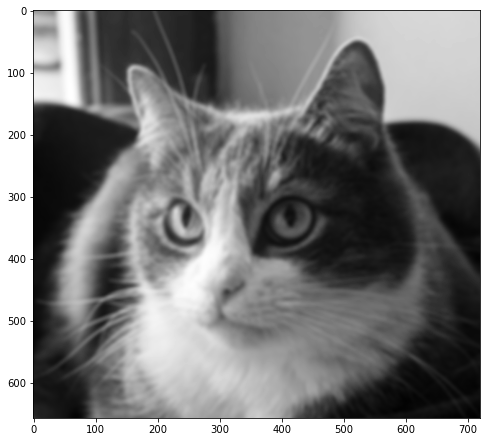

In [34]:
%%time

out_img = convolute(img[:,:,0], gaussian())
plt.figure(figsize=(8,8))
plt.imshow(out_img, cmap='gray');

In [35]:
import scipy.signal as ss

Wall time: 178 ms


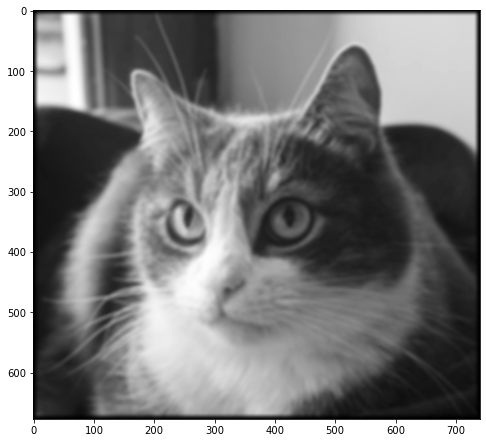

In [36]:
%%time

out_img = ss.correlate2d(img[:,:,0], gaussian(), mode='full')
plt.figure(figsize=(8,8))
plt.imshow(out_img, cmap='gray');

In [41]:
img = imageio.imread('./data/cat-color.png')
img = img.astype(np.float32)/255.0

In [42]:
def forRGB(img, core):
    out_img = [
        ss.correlate2d(img[:,:,0], gaussian(), mode='full'),
        ss.correlate2d(img[:,:,1], gaussian(), mode='full'),
        ss.correlate2d(img[:,:,2], gaussian(), mode='full')
    ]
    
    return np.stack(out_img, axis=2)

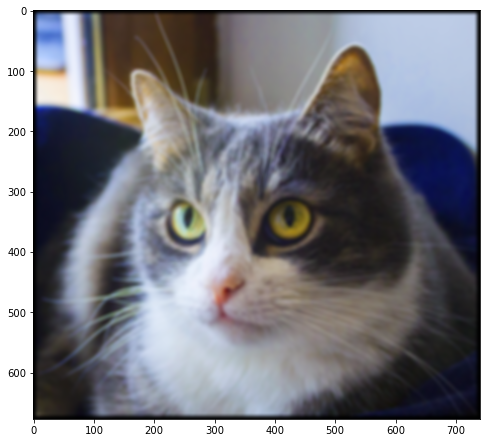

In [43]:
out_img = forRGB(img, gaussian())
plt.figure(figsize=(8,8))
plt.imshow(out_img);